# Modules and Packages

One feature of Python that makes it useful for a wide range of tasks is the fact that it comes "batteries included" – that is, the **Python standard library** contains useful tools for a wide range of tasks.
On top of this, there is a broad ecosystem of **third-party tools and packages** that offer more specialized functionality.

Here we'll take a look at importing standard library modules and tools for installing third-party modules.

## Loading Modules: the ``import`` Statement

For loading built-in and third-party modules, Python provides the ``import`` statement.
There are a few ways to use the statement, which we will mention briefly here, from most recommended to least recommended.

### Explicit module import

Explicit import of a module preserves the module's content in a namespace.
The namespace is then used to refer to its contents with a "``.``" between them.
For example, here we'll import the built-in ``math`` module and compute the sine of pi:

In [1]:
import math
math.cos(math.pi)

-1.0

In [7]:
import random
[random.random() for i in range(6) ]
random.randint?
#Return random integer in range [a, b], including both end points.
random.random?
#random() -> x in the interval [0, 1).所以括号里填的是生成的数量

In [8]:
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, /, start=0)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



### Explicit module import by alias

For longer module names, it's not convenient to use the full module name each time you access some element.
For this reason, we'll commonly use the "``import ... as ...``" pattern to create a shorter alias for the namespace.
For example, the NumPy (Numerical Python) package, a popular third-party package useful for data science, is by convention imported under the alias ``np``:

In [3]:
import numpy as np
np.cos(np.pi)

-1.0

### Explicit import of module contents

Sometimes rather than importing the module namespace, you would just like to import a few particular items from the module.
This can be done with the "``from ... import ...``" pattern.
For example, we can import just the ``cos`` function and the ``pi`` constant from the ``math`` module:

In [3]:
from math import cos, pi
cos(pi)

-1.0

### Implicit import of module contents

Finally, it is sometimes useful to import the entirety of the module contents into the local namespace.
This can be done with the "``from ... import *``" pattern:

In [4]:
from math import *
sin(pi) ** 2 + cos(pi) ** 2

1.0

The problem is that such imports can sometimes overwrite function names that you do not intend to overwrite, and the implicitness of the statement makes it difficult to determine what has changed.

For example, Python has a built-in ``sum`` function that can be used for various operations:

In [5]:
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, start=0, /)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers
    
    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



We can use this to compute the sum of a sequence, starting with a certain value (here, we'll start with ``-1``):

In [25]:
sum(range(5), -1)
#这个是什么意思?
range?
x = list(range(1,5,2))
print(x)
for i in range(1,5,2):#remember to add:!!!!
    print(i)


[1, 3]
1
3


Now observe what happens if we make the *exact same function call* after importing ``*`` from ``numpy``:

In [10]:
from numpy import *

In [11]:
sum(range(5), -1)#这个时候的sum函数变了
help(sum)

Help on function sum in module numpy:

sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)
    Sum of array elements over a given axis.
    
    Parameters
    ----------
    a : array_like
        Elements to sum.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a sum is performed.  The default,
        axis=None, will sum all of the elements of the input array.  If
        axis is negative it counts from the last to the first axis.
    
        .. versionadded:: 1.7.0
    
        If axis is a tuple of ints, a sum is performed on all of the axes
        specified in the tuple instead of a single axis or all the axes as
        before.
    dtype : dtype, optional
        The type of the returned array and of the accumulator in which the
        elements are summed.  The dtype of `a` is used by default unless `a`
        has an integer dtype of less precision than the default platform
        integer.  In 

The result is off by one!
The reason for this is that the ``import *`` statement *replaces* the built-in ``sum`` function with the ``numpy.sum`` function, which has a different call signature: in the former, we're summing ``range(5)`` starting at ``-1``; in the latter, we're summing ``range(5)`` along the last axis (indicated by ``-1``).
This is the type of situation that may arise if care is not taken when using "``import *``" – for this reason, it is best to avoid this unless you know exactly what you are doing.

## Importing from Python's Standard Library

Python's standard library contains many useful built-in modules, which you can read about fully in [Python's documentation](https://docs.python.org/3/library/).
Any of these can be imported with the ``import`` statement, and then explored using the help function seen in the previous section.
Here is an extremely incomplete list of some of the modules you might wish to explore and learn about:

- ``os`` and ``sys``: Tools for interfacing with the operating system, including navigating file directory structures and executing shell commands
- ``math`` and ``cmath``: Mathematical functions and operations on real and complex numbers
- ``itertools``: Tools for constructing and interacting with iterators and generators
- ``functools``: Tools that assist with functional programming
- ``random``: Tools for generating pseudorandom numbers
- ``pickle``: Tools for object persistence: saving objects to and loading objects from disk
- ``json`` and ``csv``: Tools for reading JSON-formatted and CSV-formatted files.
- ``urllib``: Tools for doing HTTP and other web requests.

You can find information on these, and many more, in the Python standard library documentation: https://docs.python.org/3/library/.

## Importing from Third-Party Modules

One of the things that makes Python useful, especially within the world of data science, is its ecosystem of third-party modules.
These can be imported just as the built-in modules, but first the modules must be installed on your system.
The standard registry for such modules is the Python Package Index (*PyPI* for short), found on the Web at http://pypi.python.org/.
For convenience, Python comes with a program called ``pip`` (a recursive acronym meaning "pip installs packages"), which will automatically fetch packages released and listed on PyPI (if you use Python version 2, ``pip`` must be installed separately).
For example, if you'd like to install the ``supersmoother`` package that I wrote, all that is required is to type the following at the command line:
```
$ pip install supersmoother
```
The source code for the package will be automatically downloaded from the PyPI repository, and the package installed in the standard Python path (assuming you have permission to do so on the computer you're using).

For more information about PyPI and the ``pip`` installer, refer to the documentation at http://pypi.python.org/.

### Anaconda Python

For Anaconda python, another package manager is available called [conda](http://conda.pydata.org/docs/intro.html). When working with Anaconda Python, it is generally better to try installing first with ``conda`` and then falling back to `pip` if needed.

## import your module

In [2]:
import my_module

In [4]:
my_module.<TAB>

SyntaxError: invalid syntax (<ipython-input-4-7d811df308b0>, line 1)

# Working with Files and Folders



## Reading files

Python provides functionality for accessing files and folders (directories). The `open` function is a builtin Python function that can be used to read and write files.
```Python
fin = open("f.txt")
```

Here we have opened the text file `f.txt` for reading (the default open "mode", equivalent to calling `open("f.txt", 'r')`). This creates an object (or "handle") `fin` that provides access to the file. For example,
```Python
fin.read()
```
or
```Python
fin.readline()
```
or
```Python
fin.readlines()
```
allow us different ways to read the contents of the file:

* `read` reads the file into a single string
* `readline` reads from the current position in the file until the first newline is encountered
* `readlines` reads the file into a list of strings, one list element for each line.

File handles keep track of their current position in the file, so for example if you call `fin.readline()` and then call it again, the second call will begin reading where the previous call stopped. This is handy for incrementally reading files.

File handles work well with loops:
```Python
for line in open("f.txt"):
    print(line.strip())
```
Here the for loop automatically retrieves each line of the text file and assigns it to the looping variable `line`. The `line.strip()` call removes the trailing newline character that is kept with each `line`.

In [34]:
# open a file "test_text.txt"
fin = open("./my_module.py")
test = open("./test_text.txt")
for line in test:
    print(line)
x = test.readlines()#这个是啥
print(x)
test.close()

Understand the whole of life

You must understand the whole of life, not just one part of it. That is why you must read, that is why you must look at the skies, why you must sing, dance and write poems, and suffer, and understand, for all that is life.

鈥擪RISHNAMURTI
[]


## Writing files

The `open` function can also be used to write contents to a file. Here you need to make sure to open the file in "writing mode"

```Python
fout = open("g.txt", 'w')
fout.write("Saving data...\n")
```
Note that using `.write` requires dealing with newlines.

The builtin `print` function interacts nicely with file handles:
```Python
print("Hello!", file=fout)
```
and by default it will even add the newlines for you!

It is important when you are done writing to a file to **close** it:
```Python
fout.close()
```

File handles can also be opened in "append" mode (`a`) and in binary read/write modes (`rb`, `wb`). These are less common than read mode (`r`) and write mode (`w`).

In [37]:
#new file = fout
fout = open("try.txt")
fout.write("Saving")
fout.close()

FileNotFoundError: [Errno 2] No such file or directory: 'try.txt'

## File names, paths, and working directories

A file **path** is used to represent the name and location of a file. For example, a file named `f.txt` stored in Alice Smith's Documents folder on a Mac may have the following path:
```
/Users/alicesmith/Documents/f.txt
```

Here the folder `Documents` is inside the `alicesmith` folder which is inside the `Users` folder. The forward slash character (`/`) is used as a **delimiter** to separate the elements of the path. Some operating systems use different symbols for this purpose, and Python provides an `os` and `os.path` module to handle this automatically.

### Working directories

When Python is running it has a default directory for file operations. This is known as the **working directory** or **current working directory**. For example, when opening a file just using the filename, Python assumes the file is in the current working directory.

The `os` module provides a function for printing the full path of the current working directory (cwd):
```Python
>>> import os
>>> cwd = os.getcwd()
>>> print(cwd)
/Users/alicesmith
```
This example shows the current working directory is Alice's home folder.

A **relative path** is a file path that starts from the current working directory, whereas an **absolute path** starts from the top of the file system. For example, the path `statistics/f.txt` assumes there is a folder inside the current working directory called `statistics` that contains the file `f.txt`.

The `os.path` modules allows you to convert from relative to absolute paths:
```Python
>>> os.path.abspath("statistics/f.txt")
'/Users/alicesmith/statistics/f.txt'
```

Changing the working directory is a common action and is often needed to make code that is portable across different computers. By keeping file paths relative to a working directory, machine-specific information (such as the name of user's home folder) is not needed.

# A Preview of Data Science Tools

If you would like to spring from here and go farther in using Python for scientific computing or data science, there are a few packages that will make your life much easier.
This section will introduce and preview several of the more important ones, and give you an idea of the types of applications they are designed for.
If you're using the *Anaconda* or *Miniconda* environment suggested at the beginning of this report, you can install the relevant packages with the following command:
```
$ conda install numpy scipy pandas matplotlib scikit-learn
```
Let's take a brief look at each of these in turn.

## NumPy: Numerical Python

NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

- It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
- It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

In [1]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

In [2]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

Compare this with the much more verbose Python-style list comprehension for the same result:

In [5]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a 3x3 array:

In [6]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

NumPy arrays have a `shape` attribute that is helpful to check the size of the array:

In [7]:
print(x.shape)
print(M.shape)

(9,)
(3, 3)


Here `x` is a 1-dimensional array of length 9, indicated by the shape tuple containing a single element (the trailing comma is used to distinguish a tuple of one element from a number inside parentheses), whereas `M` is a 2-dimensional array that has three rows and three columns.

* Note: If you are used to dealing with row- and column-vectors, please be aware that NumPy's array representation is somewhat different. A typical $N$-dimensional row vector, like you may encounter in a linear algebra course, would have shape `(1,N)` and likewise an $N$-dimensional column vector would have shape `(N,1)`. Yet a numpy array of shape `(N,)` behaves somewhat differently than an array of shape `(N,1)`.

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

In [8]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

or a matrix-vector product using ``np.dot``:

In [9]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

and even more sophisticated operations like eigenvalue decomposition:

In [10]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16])

Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.


## Pandas: Labeled Column-oriented Data(better than excel)

Pandas provides is a labeled interface to multi-dimensional data, in the form of a **DataFrame** object that will feel very familiar to users of R and related languages.**it can read .csv**
而且可以将几个表格整合在一起

DataFrames in Pandas look something like this:

In [41]:
import pandas as pd##DataFrame
df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df

,label,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


The Pandas interface allows you to do things like select columns by name:

In [43]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

Apply string operations across string entries:

In [13]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

Apply aggregates across numerical entries:

In [44]:
df['value'].sum()

21

And, perhaps most importantly, do efficient database-style joins and groupings:

In [45]:
df.groupby('label').sum()

,value
label,
A,5
B,7
C,9


Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python.


## Matplotlib: MATLAB-style scientific visualization

Matplotlib is currently the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``"

In [47]:
# run this only if using a Jupyter notebook
%matplotlib inline

In [48]:
import matplotlib.pyplot as plt#被叫做plt

Now let's create some data (as NumPy arrays, of course) and plot the results:

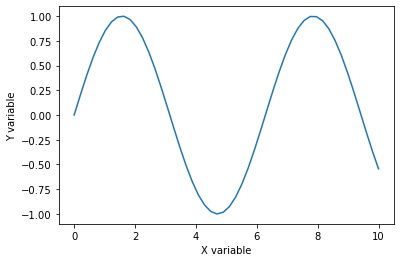

In [49]:
x = np.linspace(0, 10)  # range of values from 0 to 10
y = np.sin(x)           # sine of these values
plt.plot(x, y);         # plot as a line
plt.xlabel("X variable")
plt.ylabel("Y variable");

If you run this code live, you will see an **interactive plot** that lets you pan, zoom, and scroll to explore the data.

This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html).

## SciPy: Scientific Python

SciPy is a collection of scientific functionality that is built on top of NumPy.
The package began as a set of Python wrappers to well-known Fortran libraries for numerical computing, and has grown from there.
The package is arranged as a set of submodules, each implementing some class of numerical algorithms.
Here is an incomplete sample of some of the more important ones for data science:

- ``scipy.fftpack``: Fast Fourier transforms
- ``scipy.integrate``: Numerical integration
- ``scipy.interpolate``: Numerical interpolation
- ``scipy.linalg``: Linear algebra routines
- ``scipy.optimize``: Numerical optimization of functions
- ``scipy.sparse``: Sparse matrix storage and linear algebra
- ``scipy.stats``: Statistical analysis routines

For example, let's take a look at interpolating a smooth curve between some data

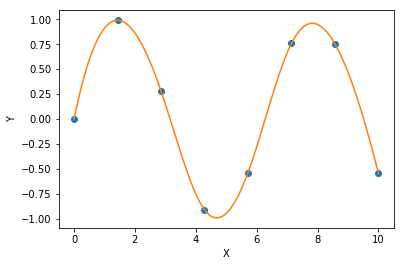

In [4]:
from scipy import interpolate

# choose eight points between 0 and 10
x = np.linspace(0, 10, 8)
y = np.sin(x)

# create a cubic interpolation function
func = interpolate.interp1d(x, y, kind='cubic')

# interpolate on a grid of 1,000 points
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# plot the results
plt.figure()  # new figure
plt.plot(x, y, 'o')
plt.plot(x_interp, y_interp)
plt.xlabel("X")
plt.ylabel("Y");

What we see is a smooth interpolation between the points.

## Other Data Science Packages

Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org) for machine learning, [Scikit-Image](http://scikit-image.org) for image analysis, and [Statsmodels](http://statsmodels.sourceforge.net/) for statistical modeling, as well as more domain-specific packages like [AstroPy](http://astropy.org) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

No matter what type of scientific, numerical, or statistical problem you are facing, it's likely there is a Python package out there that can help you solve it.

In [52]:
x='R\0S\0T'
print(len(x))


5


# Resources for Further Learning

This concludes our whirlwind tour of the Python language.
My hope is that if you read this far, you have an idea of the essential syntax, semantics, operations, and functionality offered by the Python language, as well as some idea of the range of tools and code constructs that you can explore further.

I have tried to cover the pieces and patterns in the Python language that will be most useful to a data scientist using Python, but this has by no means been a complete introduction.
If you'd like to go deeper in understanding the Python language itself and how to use it effectively, here are a handful of resources I'd recommend:

- [*Fluent Python*](http://shop.oreilly.com/product/0636920032519.do) by Luciano Ramalho. This is an excellent OReilly book that explores best practices and idioms for Python, including getting the most out of the standard library.
- [*Dive Into Python*](http://www.diveintopython.net/) by Mark Pilgrim. This is a free online book that provides a ground-up introduction to the Python language.
- [*Learn Python the Hard Way*](http://learnpythonthehardway.org/) by Zed Shaw. This book follows a "learn by trying" approach, and deliberately emphasizes developing what may be the most useful skill a programmer can learn: Googling things you don't understand.
- [*Python Essential Reference*](http://www.dabeaz.com/per.html) by David Beazley. This 700-page monster is well-written, and covers virtually everything there is to know about the Python language and its built-in libraries. For a more application-focused Python walk-through, see Beazley's [*Python Cookbook*](http://shop.oreilly.com/product/0636920027072.do).

To dig more into Python tools for data science and scientific computing:

- [*The Python Data Science Handbook*](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas. This book starts precisely where this mini-text leaves off, and provides a comprehensive guide to the essential tools in Python's data science stack, from data munging and manipulation to machine learning.
- [*Effective Computation in Physics*](http://shop.oreilly.com/product/0636920033424.do) by Kathryn D. Huff and Anthony Scopatz, is applicable to people far beyond the world of Physics research. It is a step-by-step, ground-up introduction to scientific computing, including an excellent introduction to many of the tools mentioned in this report.
- [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney, creator of the Pandas package. This book covers the Pandas library in detail, as well as giving useful information on some of the other tools that enable it.

Finally, for an even broader look at what's out there:

- [*OReilly Python Resources*](http://shop.oreilly.com/category/browse-subjects/programming/python.do) O'Reilly features a number of excellent books on Python itself and specialized topics in the Python world.
- *PyCon*, *SciPy*, and *PyData*. The PyCon, SciPy, and PyData conferences draw thousands of attendees each year, and archive the bulk of their programs each year as free online videos. These have turned into an incredible set of resources for learning about Python itself, Python packages, and related topics. Search online for videos of both talks and tutorials: the former tend to be shorter, covering new packages or fresh looks at old ones. The tutorials tend to be several hours, covering the use of the tools mentioned here as well as others.